In [248]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [249]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0] # temperature in celsius
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # temperature in unkwon unit

# convert to tensor
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [250]:
# prepares the data for training and validation by splitting it into two sets
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices


(tensor([2, 3, 8, 9, 0, 4, 6, 7, 1]), tensor([10,  5]))

In [251]:
# build training and validation sets 
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val


In [252]:
import torch.nn as nn

# creates a linear model (y = x * w + b)
# args: input size, output size, bias defaulting to True
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[3.3369],
        [2.2021]], grad_fn=<AddmmBackward0>)

In [253]:
linear_model.weight

Parameter containing:
tensor([[0.5820]], requires_grad=True)

In [254]:
linear_model.bias

Parameter containing:
tensor([-0.6436], requires_grad=True)

In [255]:
x = torch.ones(1)
linear_model(x)

tensor([-0.0617], grad_fn=<ViewBackward0>)

In [256]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.0617],
        [-0.0617],
        [-0.0617],
        [-0.0617],
        [-0.0617],
        [-0.0617],
        [-0.0617],
        [-0.0617],
        [-0.0617],
        [-0.0617]], grad_fn=<AddmmBackward0>)

In [257]:
linear_model = nn.Linear(1, 1)

optimizer = optim.SGD(      
linear_model.parameters(),    
lr=1e-2)

In [258]:
linear_model.parameters()

<generator object Module.parameters at 0x7231feff7680>

In [259]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.0352]], requires_grad=True),
 Parameter containing:
 tensor([0.1186], requires_grad=True)]

In [260]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):

        # forward pass (training)
        t_p_train = model(t_u_train)               # compute model's prediction
        loss_train = loss_fn(t_p_train, t_c_train) # compute loss

        # forward pass (validation)
        t_p_val = model(t_u_val)                   # compute model's prediction
        loss_val = loss_fn(t_p_val, t_c_val)       # compute loss

        # backward pass
        optimizer.zero_grad()                      # reset gradients
        loss_train.backward()                      # compute gradients of the loss with respect to the model's params
        optimizer.step()                           # update the model's params

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [261]:
linear_model = nn.Linear(1, 1)  # creates a linear model (y = x * w + b)
optimizer = optim.SGD(
    linear_model.parameters(),  # Stochastic Gradient Descent optimizer
    lr=1e-2)

# Train the linear model!!!
training_loop(
n_epochs = 5000,
optimizer = optimizer,
model = linear_model,           # <------
loss_fn = nn.MSELoss(),         # Mean squared error as the loss function
t_u_train = t_un_train,
t_u_val = t_un_val,
t_c_train = t_c_train,
t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 336.4073, Validation loss 483.3840
Epoch 1000, Training loss 3.7218, Validation loss 3.6268
Epoch 2000, Training loss 3.1653, Validation loss 2.3441
Epoch 3000, Training loss 3.1539, Validation loss 2.1827
Epoch 4000, Training loss 3.1536, Validation loss 2.1600
Epoch 5000, Training loss 3.1536, Validation loss 2.1567
Epoch 6000, Training loss 3.1536, Validation loss 2.1564
Epoch 7000, Training loss 3.1536, Validation loss 2.1564
Epoch 8000, Training loss 3.1536, Validation loss 2.1564
Epoch 9000, Training loss 3.1536, Validation loss 2.1564
Epoch 10000, Training loss 3.1536, Validation loss 2.1564

Parameter containing:
tensor([[5.2486]], requires_grad=True)
Parameter containing:
tensor([-16.7774], requires_grad=True)


In [262]:
# defines a neural network!!!!!!!

seq_model = nn.Sequential(
nn.Linear(1, 13), # first layer:  linear layer w/ 1 input and 13 outputs (hidden) 
nn.Tanh(),        # hyperbolic tangent (tanh) activation function
nn.Linear(13, 1)  # second layer: linear layer w/ 13 inputs and 1 output
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [263]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [264]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [265]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
('hidden_linear', nn.Linear(1, 8)),
('hidden_activation', nn.Tanh()),
('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [266]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [267]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.3249], requires_grad=True)

In [ ]:
# using our neural network!!!

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
n_epochs = 5000,
optimizer = optimizer,
model = seq_model,   # <-------
loss_fn = nn.MSELoss(),
t_u_train = t_un_train,
t_u_val = t_un_val,
t_c_train = t_c_train,
t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 163.2667, Validation loss 237.9175
Epoch 1000, Training loss 5.9420, Validation loss 2.7186
Epoch 2000, Training loss 3.9522, Validation loss 3.2682
Epoch 3000, Training loss 2.3372, Validation loss 0.1852
Epoch 4000, Training loss 2.2180, Validation loss 0.1151
Epoch 5000, Training loss 2.1853, Validation loss 0.1059
Epoch 6000, Training loss 2.1581, Validation loss 0.1513
Epoch 7000, Training loss 2.1607, Validation loss 0.2948
Epoch 8000, Training loss 2.1303, Validation loss 0.1875
Epoch 9000, Training loss 2.1204, Validation loss 0.1959
Epoch 10000, Training loss 2.1115, Validation loss 0.2067
output tensor([[20.7162],
        [ 7.4231]], grad_fn=<AddmmBackward0>)
answer tensor([[21.],
        [ 8.]])
hidden tensor([[-2.3639e-03],
        [-7.9918e-04],
        [ 2.6703e-05],
        [ 2.7790e-03],
        [ 3.3824e-03],
        [-1.1381e-02],
        [ 2.7705e-02],
        [ 1.0185e-02]])


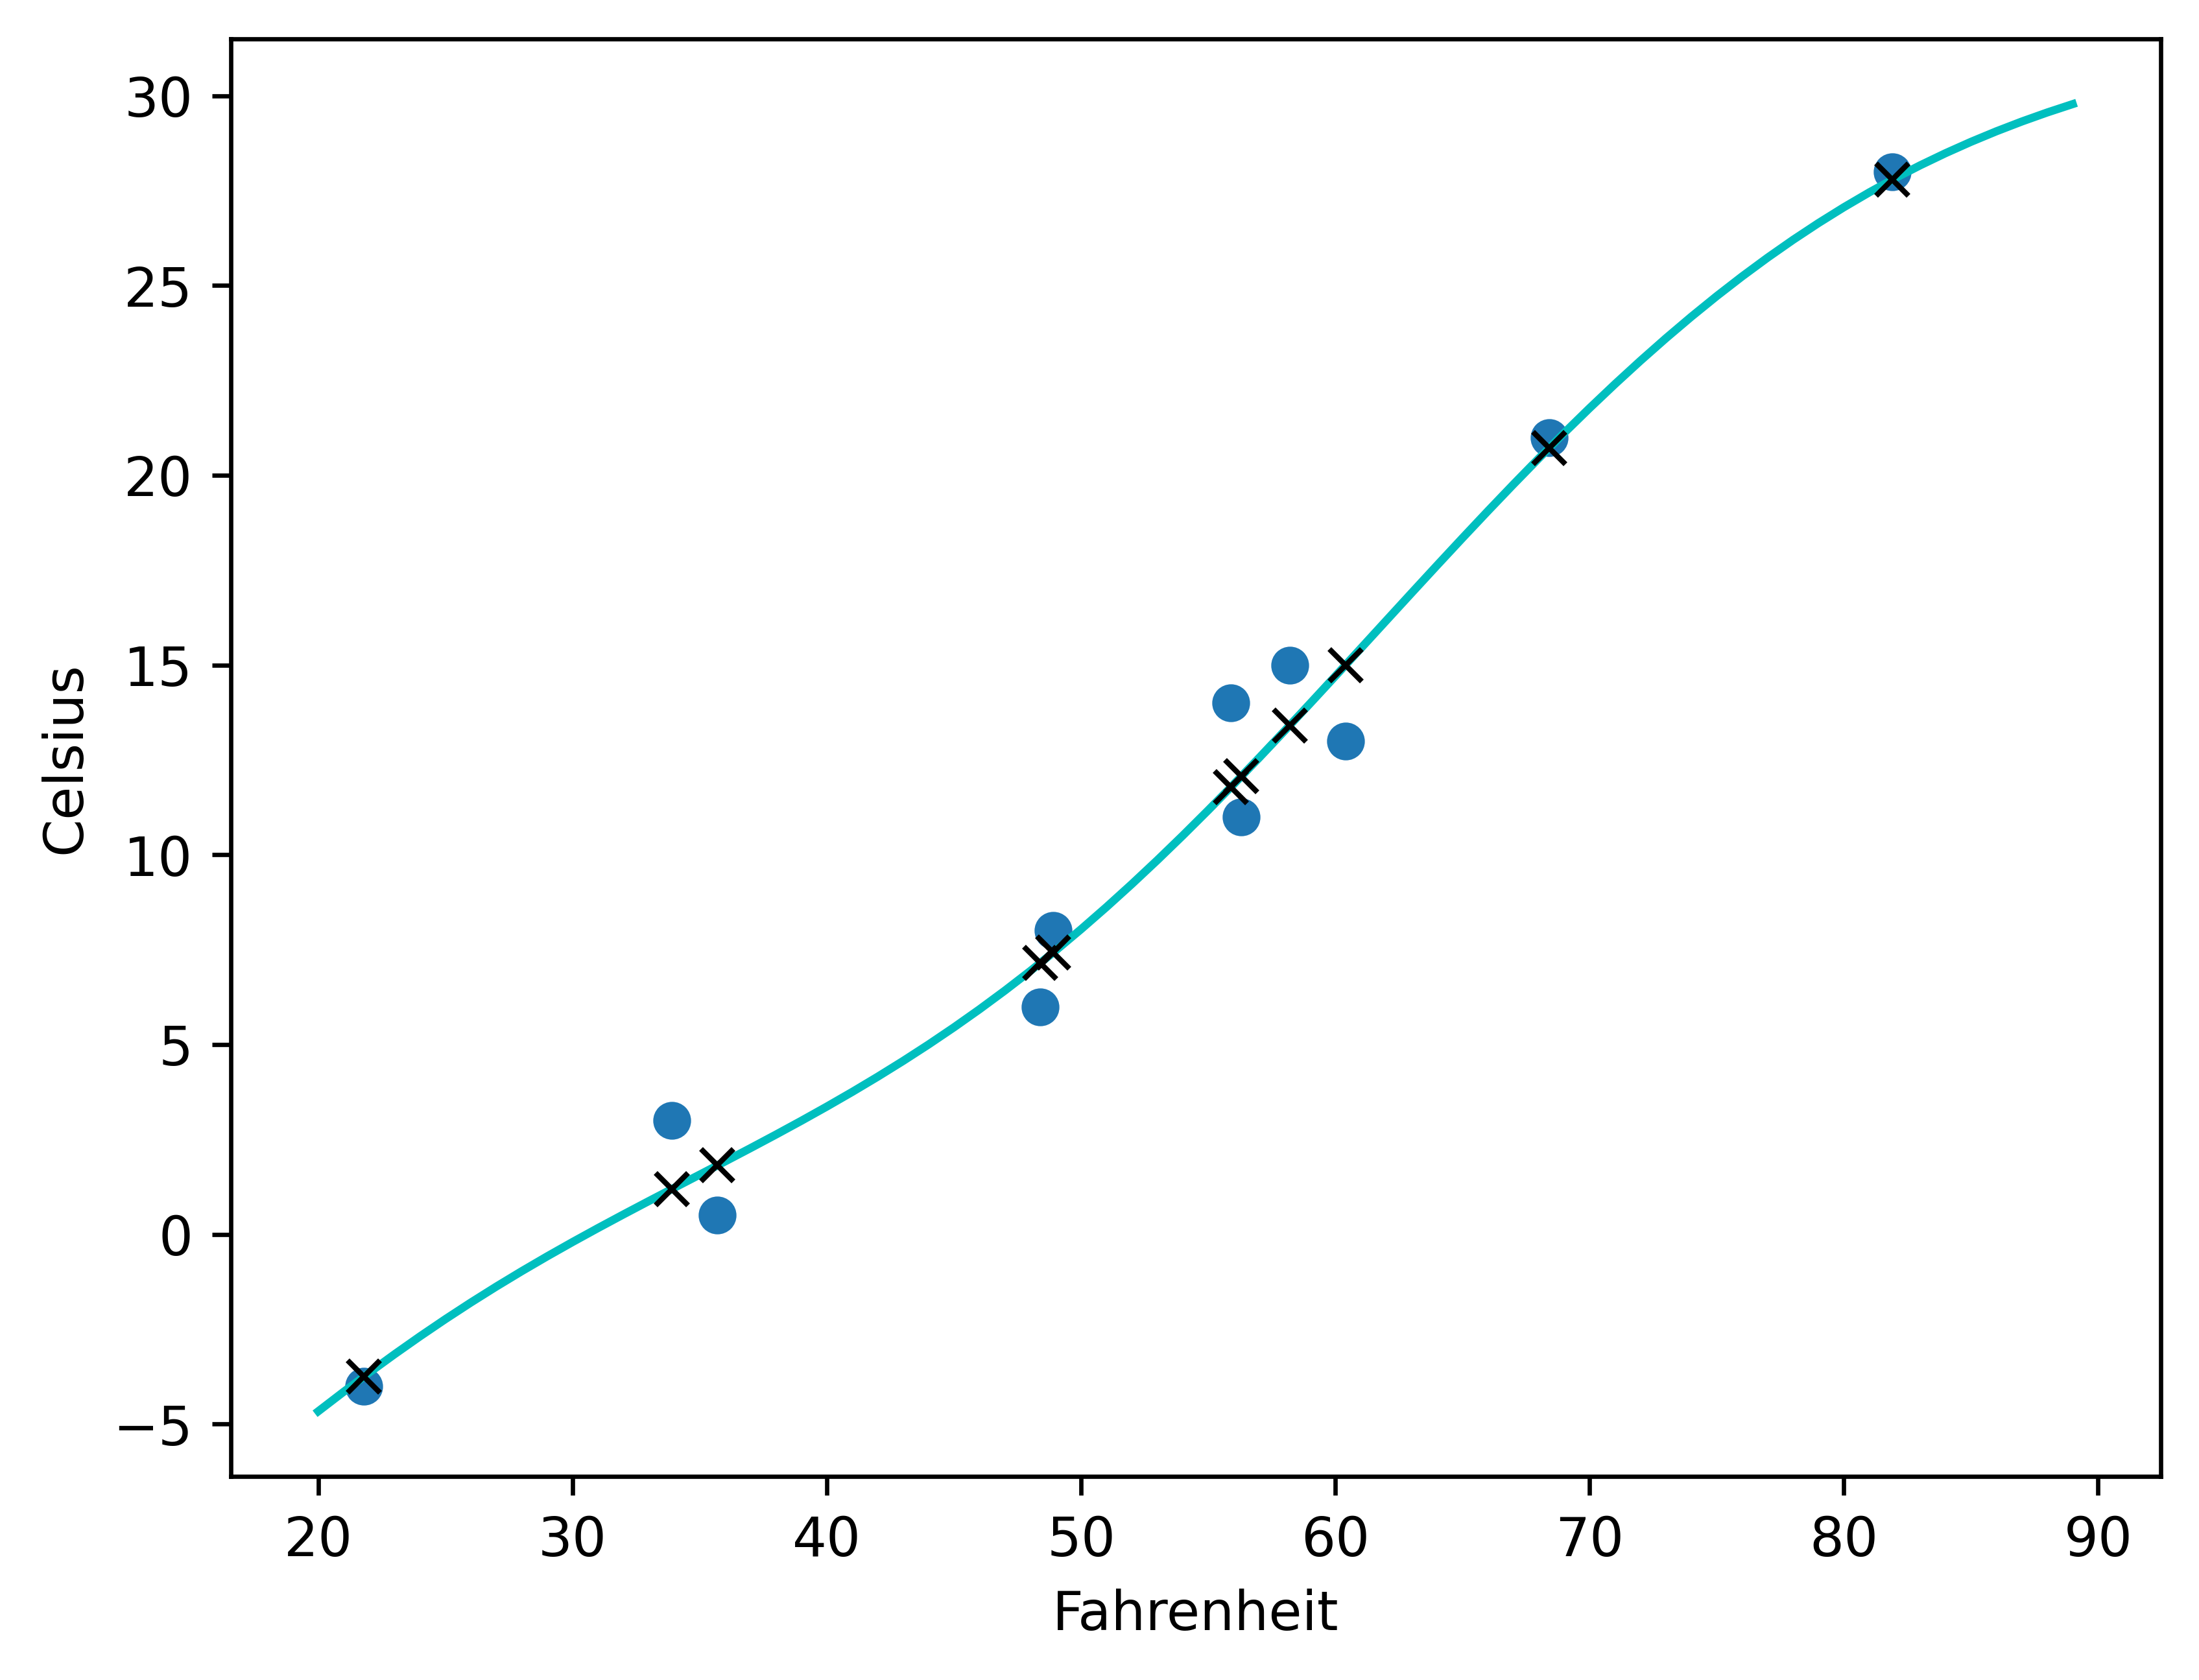

In [269]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')